In [1]:
import netCDF4
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
import datetime# as dt
import urllib
import time
import calendar
import csv

In [12]:
stn = '154'
startdate = "01/24/2025" # MM/DD/YYYY
enddate = "01/25/2025"

In [11]:
# Comment out the URL that you are not using

# CDIP Archived Dataset URL
data_url = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/archive/' + stn + 'p1/' + stn + 'p1_historic.nc'

# CDIP Realtime Dataset URL
# data_url = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/realtime/' + stn + 'p1_rt.nc'

In [4]:
nc = netCDF4.Dataset(data_url)

In [5]:
ncTime = nc.variables['sstTime'][:]
timeall = [datetime.datetime.fromtimestamp(t) for t in ncTime] # Convert ncTime variable to datetime stamps
Hs = np.asarray(nc.variables['waveHs'])  #wave height
Tp = np.asarray(nc.variables['waveTp'])  #peak period
Dp = np.asarray(nc.variables['waveDp'])  #directional peak

Fq = np.asarray(nc.variables['waveFrequency'])
Ed = np.asarray(nc.variables['waveEnergyDensity'])
#waveTime = np.asarray(nc.variables['waveTime'][:])

In [54]:
np.mean(np.diff(Fq))
1/np.mean(np.diff(Fq))

np.float32(113.51352)

In [63]:
time = np.asarray(ncTime)

time = [x - time[0] for x in time]
time = [x/1000 for x in time]
time

[np.float64(0.0),
 np.float64(1.8),
 np.float64(3.6),
 np.float64(5.4),
 np.float64(7.2),
 np.float64(9.0),
 np.float64(10.8),
 np.float64(12.6),
 np.float64(14.4),
 np.float64(16.2),
 np.float64(18.0),
 np.float64(19.8),
 np.float64(21.6),
 np.float64(23.4),
 np.float64(25.2),
 np.float64(27.0),
 np.float64(28.8),
 np.float64(30.6),
 np.float64(32.4),
 np.float64(34.2),
 np.float64(36.0),
 np.float64(37.8),
 np.float64(39.6),
 np.float64(41.4),
 np.float64(43.2),
 np.float64(45.0),
 np.float64(46.8),
 np.float64(48.6),
 np.float64(50.4),
 np.float64(52.2),
 np.float64(54.0),
 np.float64(55.8),
 np.float64(57.6),
 np.float64(59.4),
 np.float64(61.2),
 np.float64(63.0),
 np.float64(64.8),
 np.float64(66.6),
 np.float64(68.4),
 np.float64(70.2),
 np.float64(72.0),
 np.float64(73.8),
 np.float64(75.6),
 np.float64(77.4),
 np.float64(79.2),
 np.float64(81.0),
 np.float64(82.8),
 np.float64(84.6),
 np.float64(86.4),
 np.float64(88.2),
 np.float64(90.0),
 np.float64(91.8),
 np.float64(93.6),

# Saving Data

In [64]:
#np.savetxt("data_example.csv", Hs, delimiter=",")

In [65]:
data_arrays = (time, Hs, Tp, Dp, Fq, Ed)

# Save arrays to CSV
with open('data_example_3.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    # Write header row (optional)
    writer.writerow(['time', 'Hs', 'Tp', 'Dp', 'Fq', 'Ed'])
    
    # Write each row of arrays
    for row in zip(*data_arrays):
        writer.writerow(row)

# 1D Spectrum Formula

In [6]:
# sampling rate (cpm)
ks = 1
# sampling interval
dx = 1.0/ks


dk = 1/len(Hs)



In [7]:
def compute_1d_spectrum(eta,dx):
    etak = fft(eta)
    Nfft = len(eta)
    k = np.fft.fftfreq(Nfft)/(dx)
    # compute spectrum
    PSD=np.abs(etak)**2/Nfft**2/dk # power spectral density ( m^2 / cpm )
    # keep only positive frequencies
    Npos=int(Nfft/2)
    kp = k[0:Npos]
    PSD=2*PSD[0:Npos] # times two to account for the variance of the ambigous negative frequencies



ko = 1/len(Hs)
yx = 1*np.cos(2*np.pi*ko*x) # compute spatial series with a wave amplitde of 1 and wavenumber ko (assume are units m)

# Hann taper
taper=.5*(1 - np.cos(2*np.pi*(np.arange(0,Nfft)/(Nfft-1))))

# apply taper
yxt=yx*taper


    return PSD,k,kp  # smoothed spectrum PSDs at center wavenumber ksc

In [8]:
[PSD, k, kp] = compute_1d_spectrum(Hs, df)

In [9]:
# check the integral over all frequncies to match the variance
sum(PSDt*dk)

NameError: name 'PSDt' is not defined

NameError: name 'PSDt' is not defined

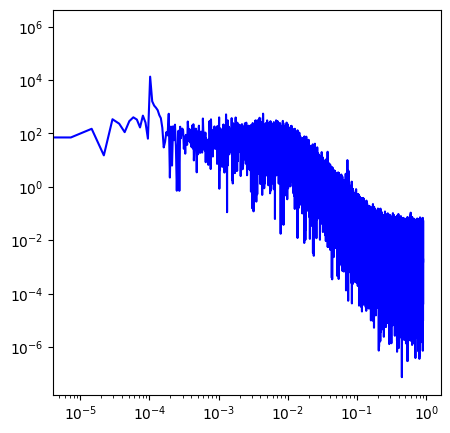

In [10]:
# compare the spectra
plt.figure(figsize = (5, 5))
plt.loglog(kp, PSD, 'b',label='raw')
plt.loglog(kp, PSDt, 'r',label='tapered')
plt.xlabel('k (cpm)',fontsize=12)
plt.ylabel('Pyy (m$^2$/cpm)',fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()